In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Exploration

In [2]:
full_data = pd.read_excel("../RNADataNew.xlsx", usecols="A:D")

In [3]:
data = full_data.to_numpy()

In [4]:
full_data

,RNA_name,RNA_length,RNA_sequence,RNA_structure
0,Nyctimantis galeata partial tRNA-Gln,17,GUAGGUUCAAUUCCUAU,(((((.......)))))
1,Dendropsophus parviceps (Sarayacu treefrog) pa...,18,GUAGGAAUCGAACCUACA,(((((.......))))).
2,Streptomyces ambofaciens ATCC 23877 tmRNA,18,CGUGGGUUCAAAUCCCAC,.(((((.......)))))
3,Phyllodytes luteolus (yellow heart-tongued fro...,19,UUGCAGGUUCAAUUCCUGU,..(((((.......)))))
4,Arabidopsis thaliana (thale cress) Ath_wt_15851,19,CGGGUUCGAUUCCCGGCUG,((((.......))))....
...,...,...,...,...
414,"Sus scrofa (pig) scRNA (ENSSSCG00005005742.1, ...",410,CGGAACCGGAGGGAGAGCGGCCGGGGCUGAGGUUGCAGUGUGCUGU...,.................................................
415,"Gemmata obscuriglobus transfer-messenger RNA, ...",410,GGGGGCGAUCUGGUAUCGACCGGGUGUCGGAAGUGUUCGGUGGCGU...,(((((((..........(((((((((((..(((((.((((((((((...
416,Eusthenia costalis partial 12S ribosomal RNA,410,UAAACUACGAUUAGAUACCCUAUUAUUUUGAAUGUAAAAAUUAAUG...,.....((((.........))))...........................
417,unclassified sequences Bacteroidales-2 RNA,410,GCACGUCCCGGAUCUUUCCCAAUCCGGCAGCUAACUGUAAGGUGAG...,.......((((((........))))))......................


In [5]:
bins = [10, 31, 51, 71, 91, 111, 131, 151, 171, 191, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391, 411]

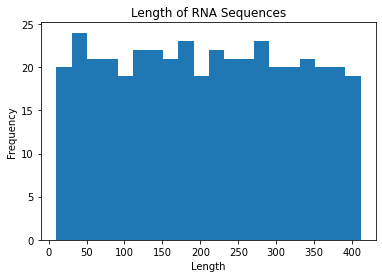

In [6]:
plt.hist(full_data["RNA_length"], bins = bins)
plt.title("Length of RNA Sequences")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.savefig("RNA_hist")

## Analyze Results - RBP Score

In [7]:
nuss_RBP = pd.read_excel("./results_correct_nuss_tree.xlsx", usecols="C:K")
zuker_RBP = pd.read_excel("./results_correct_zuker_tree.xlsx", usecols="C:K")
seqfold_RBP = pd.read_excel("./results_correct_seqfold_tree.xlsx", usecols="C:K")

In [11]:
nuss_mean = []
nuss_std = []
zuk_mean = []
zuk_std = []
seq_mean = []
seq_std = []

In [12]:
def create_df_in_range(lower_bound, upper_bound):
    nuss = nuss_RBP[nuss_RBP["RNA_length"].apply(lambda x: x in range(lower_bound, upper_bound))]
    zuk = zuker_RBP[zuker_RBP["RNA_length"].apply(lambda x: x in range(lower_bound, upper_bound))]
    seqfold = seqfold_RBP[seqfold_RBP["RNA_length"].apply(lambda x: x in range(lower_bound, upper_bound))]
    return nuss, zuk, seqfold

In [13]:
def format_data(nuss_df, zuk_df, seq_df):
    zuk1 = zuk_df["RBP_score"].tolist()
    nuss1 = nuss_df["RBP_score"].tolist()
    seq1 = seq_df["RBP_score"].tolist()
    zipped_scores = zip(nuss1, zuk1, seq1)
    zipped_scores = list(zipped_scores)
    return np.mean(nuss1), np.std(nuss1), np.mean(zuk1), np.std(zuk1), np.mean(seq1), np.std(seq1), zipped_scores

In [14]:
def plot_data(score_list, plot_name):
    x = ["Nussinov", "Zuker", "Seqfold"]
    for item in score_list:
        plt.plot(x,item)
    plt.xlabel("Algorithm")
    plt.ylabel("RBP Score")
    plt.title(plot_name)

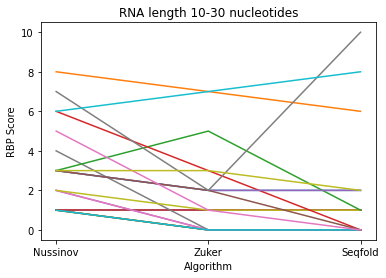

In [15]:
nuss30, zuk30, seq30 = create_df_in_range(10, 31)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss30, zuk30, seq30)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 10-30 nucleotides")

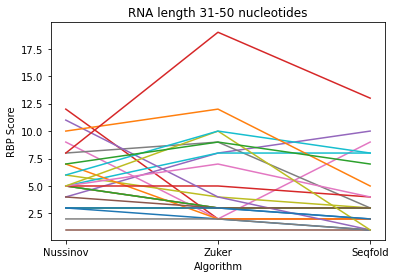

In [16]:
nuss50, zuk50, seq50 = create_df_in_range(31, 51)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss50, zuk50, seq50)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 31-50 nucleotides")

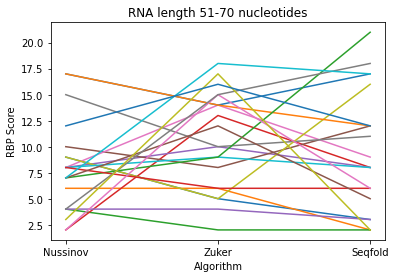

In [17]:
nuss70, zuk70, seq70 = create_df_in_range(51, 71)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss70, zuk70, seq70)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 51-70 nucleotides")

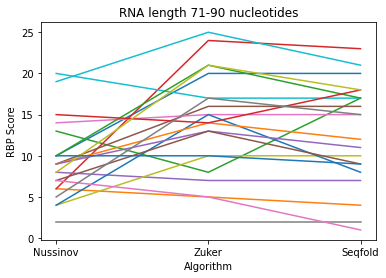

In [18]:
nuss90, zuk90, seq90 = create_df_in_range(71, 91)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss90, zuk90, seq90)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 71-90 nucleotides")

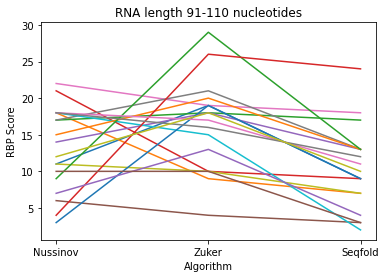

In [19]:
nuss110, zuk110, seq110 = create_df_in_range(91, 111)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss110, zuk110, seq110)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 91-110 nucleotides")

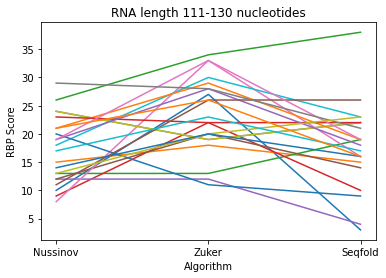

In [20]:
nuss130, zuk130, seq130 = create_df_in_range(111, 131)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss130, zuk130, seq130)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 111-130 nucleotides")

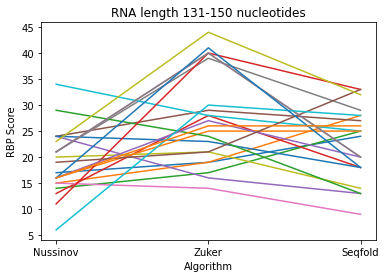

In [21]:
nuss150, zuk150, seq150 = create_df_in_range(131, 151)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss150, zuk150, seq150)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 131-150 nucleotides")

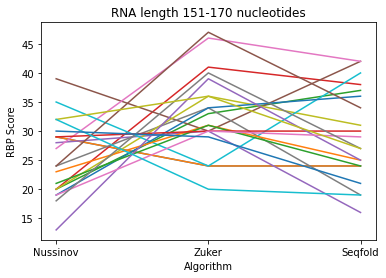

In [22]:
nuss170, zuk170, seq170 = create_df_in_range(151, 171)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss170, zuk170, seq170)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 151-170 nucleotides")

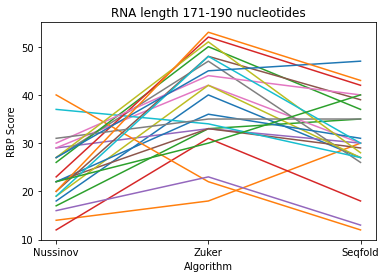

In [23]:
nuss190, zuk190, seq190 = create_df_in_range(171, 191)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss190, zuk190, seq190)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 171-190 nucleotides")

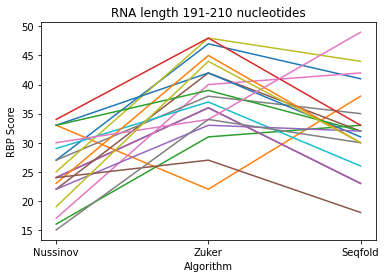

In [24]:
nuss210, zuk210, seq210 = create_df_in_range(191, 211)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss210, zuk210, seq210)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 191-210 nucleotides")

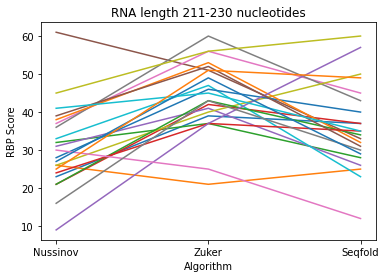

In [25]:
nuss230, zuk230, seq230 = create_df_in_range(211, 231)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss230, zuk230, seq230)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 211-230 nucleotides")

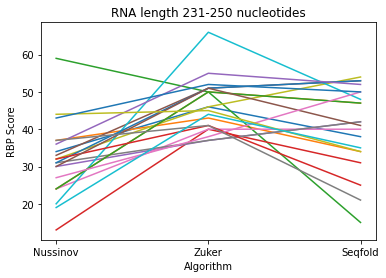

In [26]:
nuss250, zuk250, seq250 = create_df_in_range(231, 251)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss250, zuk250, seq250)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 231-250 nucleotides")

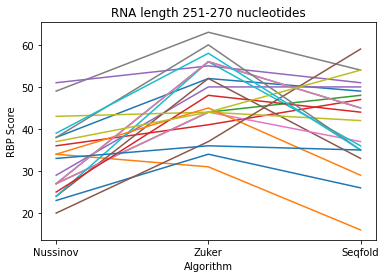

In [27]:
nuss270, zuk270, seq270 = create_df_in_range(251, 271)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss270, zuk270, seq270)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 251-270 nucleotides")

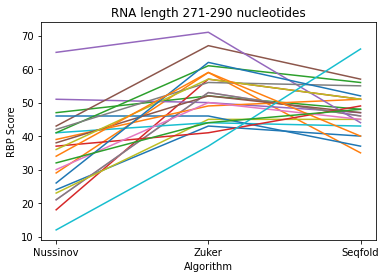

In [28]:
nuss290, zuk290, seq290 = create_df_in_range(271, 291)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss290, zuk290, seq290)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 271-290 nucleotides")

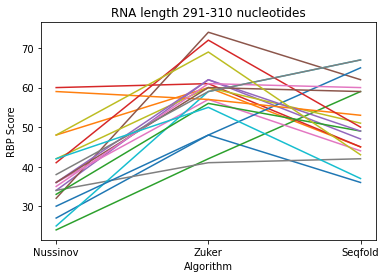

In [29]:
nuss310, zuk310, seq310 = create_df_in_range(291, 311)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss310, zuk310, seq310)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 291-310 nucleotides")

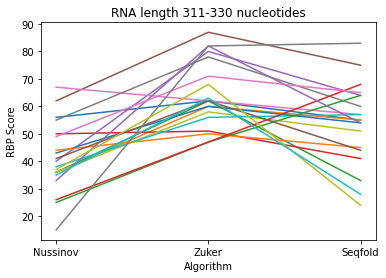

In [30]:
nuss330, zuk330, seq330 = create_df_in_range(311, 331)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss330, zuk330, seq330)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 311-330 nucleotides")

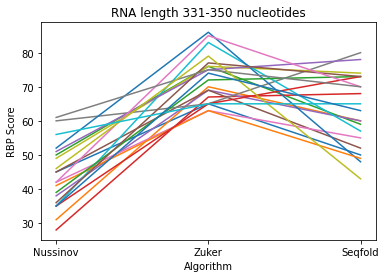

In [31]:
nuss350, zuk350, seq350 = create_df_in_range(331, 351)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss350, zuk350, seq350)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 331-350 nucleotides")

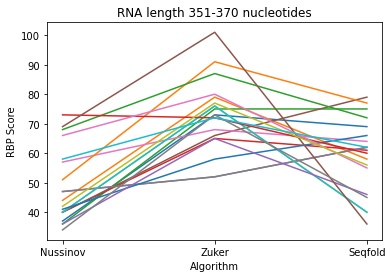

In [32]:
nuss370, zuk370, seq370 = create_df_in_range(351, 371)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss370, zuk370, seq370)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 351-370 nucleotides")

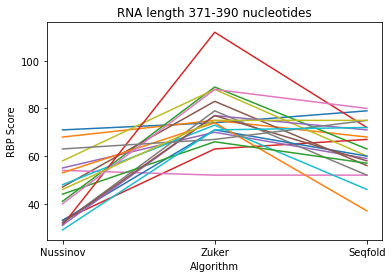

In [33]:
nuss390, zuk390, seq390 = create_df_in_range(371, 391)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss390, zuk390, seq390)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 371-390 nucleotides")

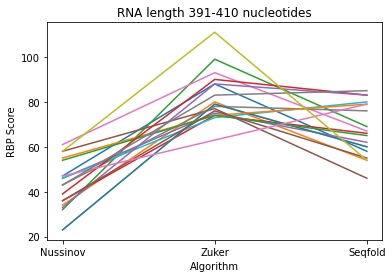

In [34]:
nuss410, zuk410, seq410 = create_df_in_range(391, 411)
nu_mean, nu_std, zu_mean, zu_std, sq_mean, sq_std, scores = format_data(nuss410, zuk410, seq410)
nuss_mean.append(nu_mean)
nuss_std.append(nu_std)
zuk_mean.append(zu_mean)
zuk_std.append(zu_std)
seq_mean.append(sq_mean)
seq_std.append(sq_std)
plot_data(scores, "RNA length 391-410 nucleotides")

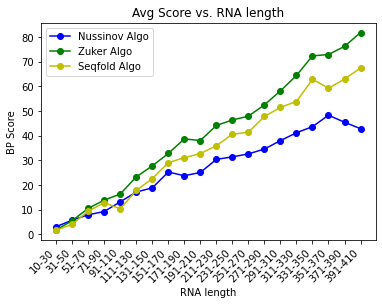

In [71]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nuss_mean, c='b', marker='o', label="Nussinov Algo")
#plt.errorbar(X, nuss_mean, yerr=nuss_std, ecolor='b')
plt.plot(X,zuk_mean, c='g', marker='o',label="Zuker Algo" )
plt.plot(X,seq_mean, c='y', marker='o',label="Seqfold Algo" )
#plt.errorbar(X, zuk_mean, yerr=zuk_std,  ecolor='b')
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("BP Score")
plt.title("Avg Score vs. RNA length")
plt.legend()
plt.savefig("AvgScoreVSlength", bbox_inches='tight')

## Analyze Results- Tree Alignment

In [39]:
tree_alignment = pd.read_excel("./TreeAlignmentScores.xlsx", usecols="B:F")

In [48]:
tree_alignment

,RNA_name,RNA_length,Nuss_Extended_tree,Zuker_Extended_tree,Seqfold_Extended_tree
0,Nyctimantis galeata partial tRNA-Gln,17,1.641602,1.625000,1.625000
1,Dendropsophus parviceps (Sarayacu treefrog) pa...,18,0.141602,0.000000,0.000000
2,Streptomyces ambofaciens ATCC 23877 tmRNA,18,0.141602,0.000000,0.000000
3,Phyllodytes luteolus (yellow heart-tongued fro...,19,0.141602,0.000000,0.000000
4,Arabidopsis thaliana (thale cress) Ath_wt_15851,19,1.641633,0.000000,0.000000
...,...,...,...,...,...
412,Ensifer adhaerens OV14 Cobalamin riboswitch,407,3.443577,3.442569,0.142640
413,Marmota monax (woodchuck) non-coding RNA,407,2.742343,2.260014,2.741366
414,"Sus scrofa (pig) scRNA (ENSSSCG00005005742.1, ...",410,2.085116,2.084140,2.599733
415,"Gemmata obscuriglobus transfer-messenger RNA, ...",410,1.658265,1.658266,0.142640


In [46]:
tree_array = tree_alignment.to_numpy()

In [65]:
length_bins = [11, 31, 51, 71, 91, 111, 131, 151, 171, 191, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391]

In [66]:
nus_tree_d = []
nus_tree_std = []
zuk_tree_d = []
zuk_tree_std = []
seqfold_tree_d = []
seqfold_tree_std = []
for bin in length_bins:
    nus_d = []
    zuk_d = []
    seq_d = []
    for row in tree_array:
        if row[1]>=bin and row[1]<bin+20:
            nus_d.append(row[2])
            zuk_d.append(row[3])
            seq_d.append(row[4])
    nus_tree_d.append(np.mean(nus_d))
    nus_tree_std.append(np.std(nus_d))
    zuk_tree_d.append(np.mean(zuk_d))
    zuk_tree_std.append(np.std(zuk_d))
    seqfold_tree_d.append(np.mean(seq_d))
    seqfold_tree_std.append(np.std(seq_d))

In [67]:
nus_tree_d
zuk_tree_d
seqfold_tree_d

[0.229931640625,
 0.4007025578430354,
 0.261701882252802,
 0.6092230514547217,
 0.26801711930068745,
 0.6175017839672331,
 0.5216100048499096,
 0.8486587281319915,
 1.2211845499633436,
 0.8828780859300309,
 1.0896382387992558,
 1.4880673388966272,
 1.4255659098098612,
 1.0390081297557534,
 1.0634458147390107,
 1.1423596965593603,
 1.2341470639180727,
 1.1433835834673034,
 1.3406864062505448,
 1.29712773272297]

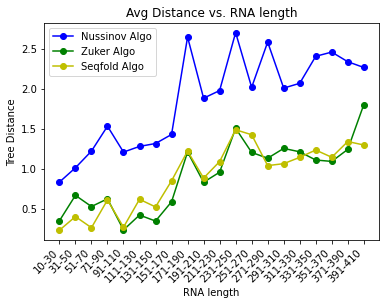

In [70]:
X = ["10-30", "31-50", "51-70", "71-90", "91-110", "111-130", "131-150", "151-170", "171-190", "191-210", "211-230", 
     "231-250","251-270", "271-290", "291-310", "311-330", "331-350", "351-370", "371-390", "391-410"]
plt.plot(X,nus_tree_d, c='b', marker='o', label="Nussinov Algo")
#plt.errorbar(X, nuss_mean, yerr=nuss_std, ecolor='b')
plt.plot(X,zuk_tree_d, c='g', marker='o',label="Zuker Algo" )
plt.plot(X,seqfold_tree_d, c='y', marker='o',label="Seqfold Algo" )
#plt.errorbar(X, zuk_mean, yerr=zuk_std,  ecolor='b')
plt.xticks(rotation=45, ha="right")
plt.xlabel("RNA length")
plt.ylabel("Tree Distance")
plt.title("Avg Distance vs. RNA length")
plt.legend()
plt.savefig("TreeDistancevslength", bbox_inches='tight')